# Titanic Survival Prediction
##### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg, which caused  the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 
##### The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket, class, fare, cabin, and whether or not they survived. This project will use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not..ed

## 1. Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [2]:
#Importing the dataset

df = pd.read_csv('C:/Users/apple/Desktop/study/project/codsoft/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking duplicates

df.duplicated().sum()

0

In [4]:
# Dropping less important features

df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
#Checking the stats of all the columns

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking the null values

df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
# Filling missing values

# Fill missing values in age column by imputing the median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill missing values in embarked column by imputing the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
dtype: int64

#### The stats seem to be fine, let us gain more undestanding by visualising the dataset.

## 2. Exploratory Data Analysis (EDA)

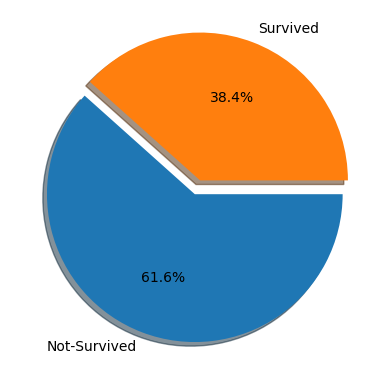

In [10]:
#Let us first analyze the distribution of the target variable

labels = ['Not-Survived','Survived']
MAP={}
for e, i in enumerate(df['Survived'].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}

df1 = df.copy()
df1['Survived']=df['Survived'].map(MAP)
plt.pie(df1['Survived'].value_counts(), labels=df1['Survived'].value_counts().index, counterclock=False, shadow=True, 
         explode=[0,0.1],autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

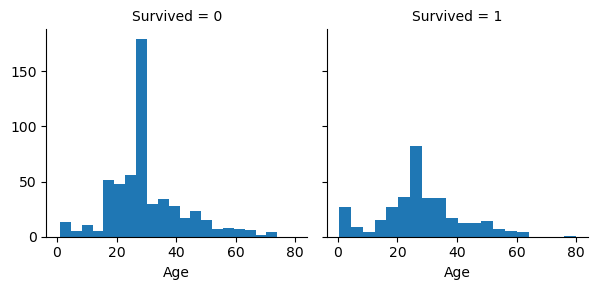

In [11]:
# visulize age distribution about whether they are survived or not

age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)
age.add_legend()
plt.show()

#### Whether survived or not, young people between 20 and 40 are most.

<Axes: ylabel='count'>

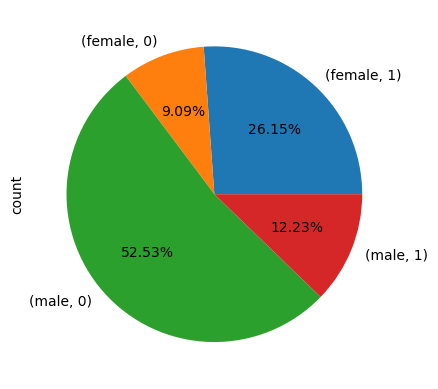

In [12]:
# visulize sex distribution about whether they are survived or not

gpsex=df.Survived.groupby(df.Sex).value_counts()
gpsex.plot.pie(autopct='%.2f%%')

#### Most men died, and most women survived.

<Axes: xlabel='Survived', ylabel='count'>

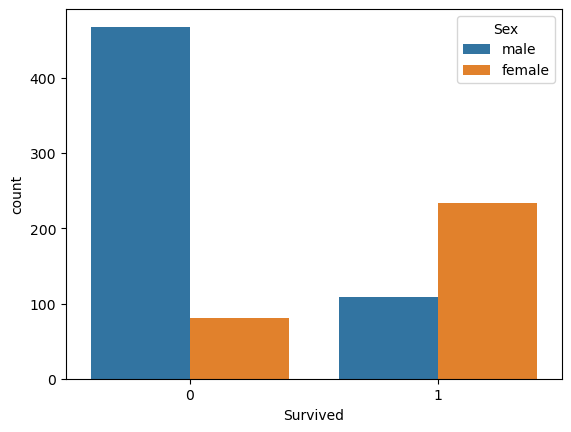

In [13]:
sns.countplot(x='Survived',data=df,hue='Sex')

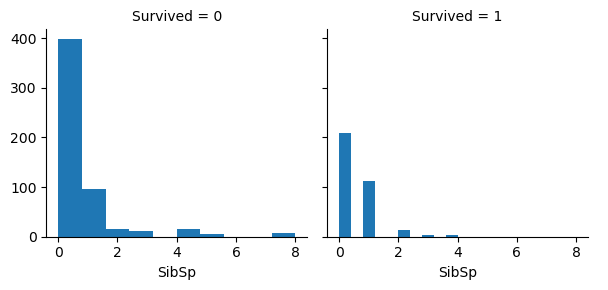

In [14]:
# visulize SibSp distribution about whether they are survived or not

SibSp=sns.FacetGrid(df,col='Survived')
SibSp.map(plt.hist,'SibSp',bins=10)
SibSp.add_legend()
plt.show()

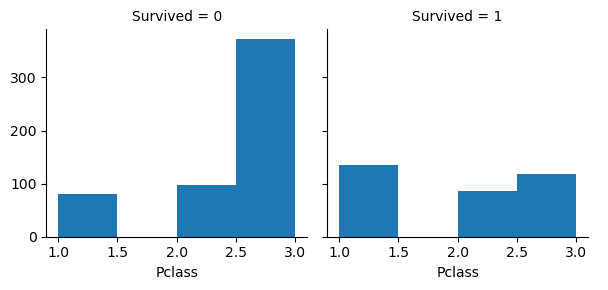

In [15]:
# visulize Pclass distribution about whether they are survived or not

Pclass=sns.FacetGrid(df,col='Survived')
Pclass.map(plt.hist,'Pclass',bins=4)
Pclass.add_legend()
plt.show()

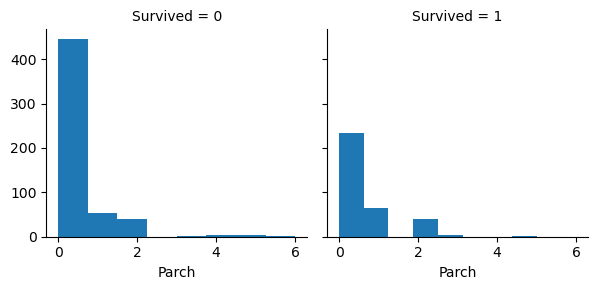

In [16]:
# visulize Parch distribution about whether they are survived or not

Parch=sns.FacetGrid(df,col='Survived')
Parch.map(plt.hist,'Parch',bins=8)
Parch.add_legend()
plt.show()

In [17]:
sv_em = df[['Survived', 'Embarked']].value_counts().reset_index()
sv_em

,Survived,Embarked,count
0,0,S,427
1,1,S,219
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


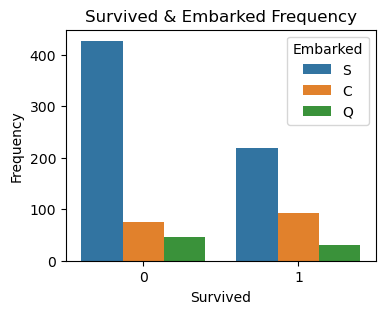

In [18]:
plt.figure(figsize=(4,3))
sns.barplot(data=sv_em , x=sv_em['Survived'], y=sv_em['count'], hue=sv_em['Embarked'])
plt.title('Survived & Embarked Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

## 3. Preprocessing

In [19]:
# Label Encoding

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## 4. Feature Selection

In [21]:
#Checking the correlation

df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


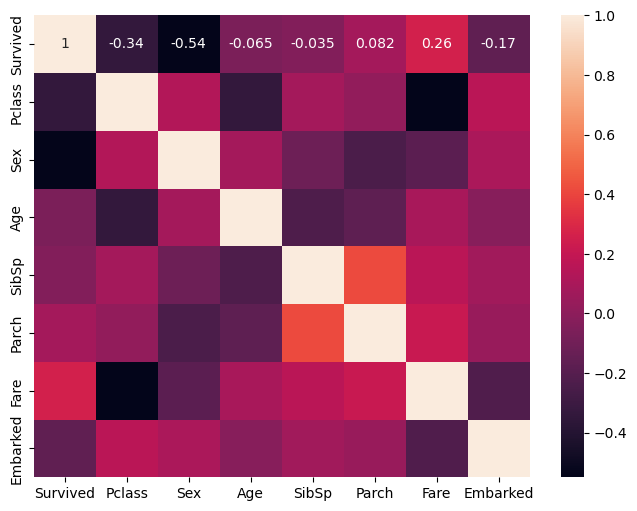

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 5. Data Manipulation

In [23]:
#Splitting the data intro training & testing sets

X=df.drop(columns=['Survived'])
Y=df['Survived']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [24]:
#Feature Scaling (Standardization)

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,9.355812e-17,-9.979533e-18,1.746418e-17,1.746418e-17,2.245395e-17,5.363999e-17,-9.480556e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.614136e+00,-1.380624e+00,-2.214363e+00,-4.707224e-01,-4.793416e-01,-6.274674e-01,-2.025053e+00
25%,-4.005512e-01,-1.380624e+00,-5.542135e-01,-4.707224e-01,-4.793416e-01,-4.748670e-01,-7.307642e-01
50%,8.130337e-01,7.243102e-01,-9.263364e-02,-4.707224e-01,-4.793416e-01,-3.491435e-01,5.635246e-01
75%,8.130337e-01,7.243102e-01,4.458762e-01,3.799232e-01,-4.793416e-01,-4.017244e-02,5.635246e-01
max,8.130337e-01,7.243102e-01,3.907725e+00,6.334442e+00,7.104908e+00,9.237724e+00,5.635246e-01


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,-0.129359,-0.087089,0.060294,-0.128563,0.014976,-0.036620,-0.181234
std,1.064922,1.027361,1.006549,0.621570,1.091102,0.759588,1.104955
min,-1.614136,-1.380624,-2.182821,-0.470722,-0.479342,-0.627467,-2.025053
25%,-1.614136,-1.380624,-0.554214,-0.470722,-0.479342,-0.475429,-0.730764
50%,0.813034,0.724310,-0.092634,-0.470722,-0.479342,-0.348262,0.563525
75%,0.813034,0.724310,0.522806,0.379923,-0.479342,-0.003387,0.563525
max,0.813034,0.724310,3.215356,2.931860,5.840867,4.424713,0.563525


## 6. Predictive Modeling

In [25]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(Train_X,Train_Y)

LogisticRegression(max_iter=1000)

In [26]:
lg.score(Train_X,Train_Y)

0.800561797752809

In [27]:
y_pred=lg.predict(Test_X)
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [28]:
Dt=DecisionTreeClassifier()
Dt.fit(Train_X,Train_Y)

DecisionTreeClassifier()

In [29]:
Dt.score(Train_X,Train_Y)

0.9789325842696629

In [30]:
y_pred=Dt.predict(Test_X)
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [31]:
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(Train_X,Train_Y)

RandomForestClassifier(n_estimators=1000)

In [32]:
Rf.score(Train_X,Train_Y)

0.9789325842696629

In [33]:
y_pred=Rf.predict(Test_X)
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [34]:
knn = KNeighborsClassifier(5)
knn.fit(Train_X,Train_Y)

KNeighborsClassifier()

In [35]:
knn.score(Train_X,Train_Y)

0.7949438202247191

In [36]:
y_pred=knn.predict(Test_X)
print(classification_report(Test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



#### The Logistic Regression & Random Forest Classifier performed exceptionally well on the current dataset, considering F1-Score as the key-metric.